# StackSTAC + Greenland measures

In [1]:
#!pip install --no-deps stackstac

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\stackstac\lib\site-packages\ipykernel\parentpoller.py:110: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


Thanks to Scott Henderson for https://gist.github.com/scottyhq/c4a4e889b58a0a153dd5fb18bad9f3e8 point out some quirks

In [44]:
#Use pystac-api to list all collections
# Can up number of returned results
import intake
import pandas as pd
limit = 500


In [8]:
cat2 = intake.open_stac_catalog(f'https://cmr.earthdata.nasa.gov/stac/USGS_EROS/collections?limit={limit}')
col_info2 = pd.DataFrame(cat2.metadata['collections'])
col_info2.head(1)

id  stac_version       license  \
0  EO1_ALI.v1  1.0.0-beta.2  not-provided   

                                       title  \
0  Earth Observing-1 Advanced Land Imager V1   

                                         description  \
0  Abstract: The Earth Observing-1(EO-1) satellit...   

                                               links  \
0  [{'rel': 'self', 'href': 'https://cmr.earthdat...   

                                              extent  
0  {'crs': 'http://www.opengis.net/def/crs/OGC/1....

In [9]:
col_info2[col_info2.title.str.contains('Landsat')]

id  stac_version       license  \
3       Landsat1-5_MSS_C1.v1  1.0.0-beta.2  not-provided   
4        Landsat4-5_TM_C1.v1  1.0.0-beta.2  not-provided   
5    Landsat7_ETM_Plus_C1.v1  1.0.0-beta.2  not-provided   
6   Landsat_8_OLI_TIRS_C1.v1  1.0.0-beta.2  not-provided   
7               MOSAICETM.v1  1.0.0-beta.2  not-provided   
8                  ETMPAN.v1  1.0.0-beta.2  not-provided   
9                     ETM.v1  1.0.0-beta.2  not-provided   
10                    MSS.v1  1.0.0-beta.2  not-provided   
11               MOSAICTM.v1  1.0.0-beta.2  not-provided   
12                     TM.v1  1.0.0-beta.2  not-provided   
13   Landsat4-8_ARD_US_C1.v1  1.0.0-beta.2  not-provided   

                                                title  \
3   Landsat 1-5 Multispectral Scanner (MSS) Collec...   
4         Landsat 4-5 Thematic Mapper Collection 1 V1   
5   Landsat 7 Enhanced Thematic Mapper Plus (ETM+)...   
6   Landsat 8 Operational Land Imager (OLI) and Th...   
7   Tri-Decadal Global Landsat Orthorectified ETM+...   
8   Tri-Decadal Global Landsat Orthorectified ETM+...   
9   Tri-Decadal Global Landsat Orthorectified ETM+...   
10  Tri-Decadal Global Landsat Orthorectified MSS ...   
11  Tri-Decadal Global Landsat Orthorectified TM M...   
12  Tri-Decadal Global Landsat Orthorectified TM S...   
13      U.S. Landsat 4-8 Analysis Ready Data (ARD) V1   

                                          description  \
3   Abstract: The Landsat Multispectral Scanner (M...   
4   The USGS Earth Resources Observation and Scien...   
5   Abstract: The Landsat Enhanced Thematic Mapper...   
6   Abstract: The Operational Land Imager (OLI) an...   
7    Abstract: The Landsat Orthorectified data col...   
8    Abstract: The Landsat Orthorectified data col...   
9    Abstract: The Landsat Orthorectified data col...   
10   Abstract: The Landsat Orthorectified data col...   
11   Abstract: The Landsat Orthorectified data col...   
12   Abstract: The Landsat Orthorectified data col...   
13  U.S. Landsat Analysis Ready Data (ARD) are con...   

                                                links  \
3   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
4   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
5   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
6   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
7   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
8   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
9   [{'rel': 'self', 'href': 'https://cmr.earthdat...   
10  [{'rel': 'self', 'href': 'https://cmr.earthdat...   
11  [{'rel': 'self', 'href': 'https://cmr.earthdat...   
12  [{'rel': 'self', 'href': 'https://cmr.earthdat...   
13  [{'rel': 'self', 'href': 'https://cmr.earthdat...   

                                               extent  
3   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
4   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
5   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
6   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
7   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
8   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
9   {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
10  {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
11  {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
12  {'crs': 'http://www.opengis.net/def/crs/OGC/1....  
13  {'crs': 'http://www.opengis.net/def/crs/OGC/1....

In [32]:
bbox = '-53.0172669999999968,-9.5331669999999988,-48.4956669999999974,-3.1035670000000000'                       
datetime='2020-04-23/2021-04-23', 

from satsearch import Search
results = Search(url='https://cmr.earthdata.nasa.gov/stac/USGS_EROS',
                 collections=['Landsat_8_OLI_TIRS_C1.v1'], 
                 bbox = bbox,
                 datetime='2020-04-23/2021-04-23', 
                )

results.found()

226

In [36]:
#compare to element84
bbox_list = [-53.0172669999999968,-9.5331669999999988,-48.4956669999999974,-3.1035670000000000]

stac_found = Search(
    url="https://earth-search.aws.element84.com/v0",
    bbox=bbox_list,
    collections=["landsat-8-l1-c1"],
    datetime='2020-04-23/2021-04-23',
).found()  
print("found",stac_found)


found 127


In [24]:
items = results.items()

In [25]:
# unfortunately items here can be many things
i = items[4] 
i.assets

{'data': {'name': 'Download Link',
  'href': 'https://earthexplorer.usgs.gov/download/external/options/LANDSAT_8_C1/LC82230642020116LGN00/INVSVC/',
  'type': 'application/x-gzip'},
 'browse': {'href': 'https://ims.cr.usgs.gov/browse/landsat_8_c1/2020/223/064/LC08_L1TP_223064_20200425_20200509_01_T2.jpg',
  'type': 'image/jpeg'},
 'metadata': {'href': 'https://cmr.earthdata.nasa.gov/search/concepts/G1740479869-USGS_EROS.xml',
  'type': 'application/xml'}}

In [26]:
# Full STAC record
i._data

{'type': 'Feature',
 'id': 'G1740479869-USGS_EROS',
 'stac_version': '1.0.0-beta.2',
 'stac_extensions': [],
 'collection': 'Landsat_8_OLI_TIRS_C1.v1',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-49.84838, -6.47372],
    [-48.16099, -6.83655],
    [-47.79327, -5.09909],
    [-49.47545, -4.73983],
    [-49.84838, -6.47372]]]},
 'bbox': [-49.84838, -6.83655, -47.79327, -4.73983],
 'links': [{'rel': 'self',
   'href': 'https://cmr.earthdata.nasa.gov/stac/USGS_EROS/collections/Landsat_8_OLI_TIRS_C1.v1/items/G1740479869-USGS_EROS'},
  {'rel': 'parent',
   'href': 'https://cmr.earthdata.nasa.gov/stac/USGS_EROS/collections/Landsat_8_OLI_TIRS_C1.v1'},
  {'rel': 'collection',
   'href': 'https://cmr.earthdata.nasa.gov/stac/USGS_EROS/collections/Landsat_8_OLI_TIRS_C1.v1'},
  {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'},
  {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/USGS_EROS'},
  {'rel': 'via',
   'href': 'https://cmr.earthdata.nasa.gov/search/co

In [37]:
# Only works for LocalCluster (NEED NASA URS credentials in ~/.netrc for GDAL to access these urls)
import os
env = dict(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR', 
                   AWS_NO_SIGN_REQUEST='YES',
                   GDAL_MAX_RAW_BLOCK_CACHE_SIZE='200000000',
                   GDAL_SWATH_SIZE='200000000',
                   VSI_CURL_CACHE_SIZE='200000000',
                   GDAL_HTTP_COOKIEFILE=os.path.expanduser('~/cookies.txt'),
                   GDAL_HTTP_COOKIEJAR=os.path.expanduser('~/cookies.txt'))


os.environ.update(env)

In [42]:
data = [i.assets['data']['href'] for i in items]
print(data[0:2])

['https://earthexplorer.usgs.gov/download/external/options/LANDSAT_8_C1/LC82250662020114LGN00/INVSVC/', 'https://earthexplorer.usgs.gov/download/external/options/LANDSAT_8_C1/LC82250672020114LGN00/INVSVC/']


In [43]:
# open 1st file to get 'proj' extension and other info 
#this won't work as reference above to a bunch of downloads with web fun
import rasterio
with rasterio.open(data[0]) as src:
    print(src.profile)
    bounds = list(src.bounds)
    print(bounds)

RasterioIOError: '/vsicurl/https://earthexplorer.usgs.gov/download/external/options/LANDSAT_8_C1/LC82250662020114LGN00/INVSVC/' not recognized as a supported file format.

In [17]:
# NOTE: need to 
import stackstac
da = stackstac.stack(gamma0s, assets=["1"], 
                           epsg=3413, resolution=50, bounds=bounds, #explicity specify keywords if proj extension not in metadata
                           #chunksize='auto', #dtype=np.float32, #dtype='float32', #Bug? # want dask chunks ~100MB for data-proximate computing # TypeError: DType must be known for auto-chunking
                           chunksize=1e4, # NOTE: reported array bytes is uncompressed (there are lots of nans!)
                          )
da['time'] = pd.to_datetime(da.time) # hack until https://github.com/gjoseph92/stackstac/issues/2 sorted

In [18]:
da

<xarray.DataArray 'stackstac-84614e9d7ad83aeb5826fb5877c337d0' (time: 11, band: 1, y: 53220, x: 29520)>
dask.array<fetch_raster_window, shape=(11, 1, 53220, 29520), dtype=float64, chunksize=(1, 1, 10000, 10000), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) datetime64[ns] 2019-12-30T00:00:01 ... 2020-02-28T...
    id              (time) <U21 'G1997906334-NSIDC_ECS' ... 'G1997905960-NSID...
  * band            (band) <U1 '1'
  * x               (x) float64 -6.26e+05 -6.259e+05 ... 8.499e+05 8.5e+05
  * y               (y) float64 -6.95e+05 -6.95e+05 ... -3.356e+06 -3.356e+06
    end_datetime    (time) <U24 '2020-01-04T23:59:59.000Z' ... '2020-03-04T23...
    start_datetime  (time) <U24 '2019-12-30T00:00:01.000Z' ... '2020-02-28T00...
Attributes:
    spec:        RasterSpec(epsg=3413, bounds=(-626000, -3356000, 850000, -69...
    crs:         epsg:3413
    transform:   | 50.00, 0.00,-626000.00|\n| 0.00,-50.00,-695000.00|\n| 0.00...
    resolution:  50

In [19]:
subset = da.sel(time='2019-12-30', band='1', y=slice(-2254858,-2295690), x=slice(-243538,-149311)) 
subset.name = subset.id.values[0] # the dask ids are strange
subset

<xarray.DataArray 'G1997906334-NSIDC_ECS' (time: 1, y: 817, x: 1885)>
dask.array<getitem, shape=(1, 817, 1885), dtype=float64, chunksize=(1, 817, 1885), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) datetime64[ns] 2019-12-30T00:00:01
    id              (time) <U21 'G1997906334-NSIDC_ECS'
    band            <U1 '1'
  * x               (x) float64 -2.435e+05 -2.435e+05 ... -1.494e+05 -1.493e+05
  * y               (y) float64 -2.255e+06 -2.255e+06 ... -2.296e+06 -2.296e+06
    end_datetime    (time) <U24 '2020-01-04T23:59:59.000Z'
    start_datetime  (time) <U24 '2019-12-30T00:00:01.000Z'
Attributes:
    spec:        RasterSpec(epsg=3413, bounds=(-626000, -3356000, 850000, -69...
    crs:         epsg:3413
    transform:   | 50.00, 0.00,-626000.00|\n| 0.00,-50.00,-695000.00|\n| 0.00...
    resolution:  50

In [20]:
%%time
local_subset = subset.persist()

CPU times: user 3.93 s, sys: 1.89 s, total: 5.82 s
Wall time: 31.4 s


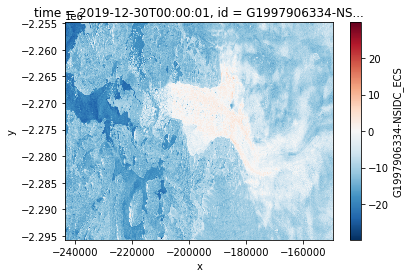

In [21]:
local_subset.isel(time=0).plot.imshow();

In [22]:
# Test out hvplot
import hvplot.xarray
local_subset.isel(time=0).hvplot.image(x='x', y='y', rasterize=True, cmap='gray', data_aspect=True)

:DynamicMap   []
   :Image   [x,y]   (G1997906334-NSIDC_ECS)